In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


# Download data

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

# Prepare data

In [0]:
#get intensity between 0 and 1 instead of 0 and 255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_valid,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5444, 6179, 5470, 5638, 5307, 4987, 5417, 5715, 5389, 5454]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([479, 563, 488, 493, 535, 434, 501, 550, 462, 495]))


# Create Neural Network

In [0]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6117 - accuracy: 0.8390 - val_loss: 0.3075 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2861 - accuracy: 0.9181 - val_loss: 0.2375 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2328 - accuracy: 0.9330 - val_loss: 0.2014 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1980 - accuracy: 0.9436 - val_loss: 0.1812 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1732 - accuracy: 0.9502 - val_loss: 0.1582 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1535 - accuracy: 0.9566 - val_loss: 0.1467 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1381 - accuracy: 0.9606 - val_loss: 0.1311 - val_accuracy:

# Visualize performance

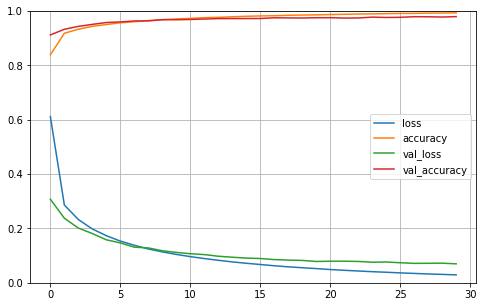

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 12.4565 - accuracy: 0.9774


[12.456469535827637, 0.977400004863739]

# Make prediction

In [15]:
Image.fromarray(X_test[1])

In [17]:
np.argmax(model.predict(X_test[1:2]),axis=1)

array([2])